# **1. Perkenalan Dataset**


## **Analisis Klasifikasi Credit Score**


---


Skor kredit (_credit score_) adalah nilai statistik yang digunakan oleh bank atau lembaga keuangan untuk menilai kelayakan kredit serta risiko seorang peminjam. Skor ini mencerminkan sejauh mana seseorang mampu mengelola kewajiban finansialnya, terutama utang, sehingga menjadi indikator utama dalam proses persetujuan pinjaman.

Seseorang yang memiliki skor kredit tinggi biasanya memiliki peluang lebih besar untuk mendapatkan pinjaman seperti KPR, kredit mobil, maupun kartu kredit, karena dianggap memiliki tanggung jawab finansial yang baik.

Dalam menentukan skor kredit seseorang, pemberi pinjaman tidak hanya melihat riwayat pembayaran, tetapi juga mempertimbangkan beberapa faktor seperti tingkat pendapatan (_income_) yang menunjukkan kemampuan finansial, tingkat pendidikan (_education_), status pernikahan (_marital status_) yang dimana dapat mempengaruhi kestabilan ekonomi rumah tangga, jumlah anak yang dimiliki (_number of children_), serta status kepemilikan rumah (_home ownership_) sebagai indikator aset dan kestabilan finansial jangka panjang.

Dataset Credit Score Dataset_raw.csv mberisi 164 observasi, yang mewakili lebih dari 100 individu dari berbagai latar belakang. Dataset ini nantinya akan digunakan untuk analisis risiko kredit serta pembangunan model klasifikasi untuk memprediksi kelayakan kredit seseorang.

Variabel target pada penelitian ini adalah 'credit score', yang diklasifikasikan menjadi tiga kategori, yaitu
##### - **High** menunjukkan risiko kredit rendah dan karakteristik keuangan yang stabil.
##### - **Average** menunjukkan risiko menengah.
##### - **Low** menunjukkan risiko tinggi dan potensi gagal bayar yang lebih besar.

Variabel target ini kemudian akan dikaitkan dengan fitur-fitur lain seperti _income_, _education_, _marital status_, _number of children_, dan _home ownership_ untuk mengetahui pola yang memengaruhi kelayakan kredit dan membangun model klasifikasi.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import drive
drive.mount('/content/drive')
url = "https://drive.google.com/uc?id=1p-7a571Cr0CgW5tnfCU9BsFZGR3bhYor"
df = pd.read_csv(url)

Mounted at /content/drive


In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [5]:
# Periksa nilai null
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education,0
Marital Status,0
Number of Children,0
Home Ownership,0
Credit Score,0


In [6]:
# Periksa nilai unik pada kolom kategorik
df.select_dtypes(include='object').nunique()

,0
Gender,2
Education,5
Marital Status,2
Home Ownership,2
Credit Score,3


In [7]:
# Melihat statistik deskriptif
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


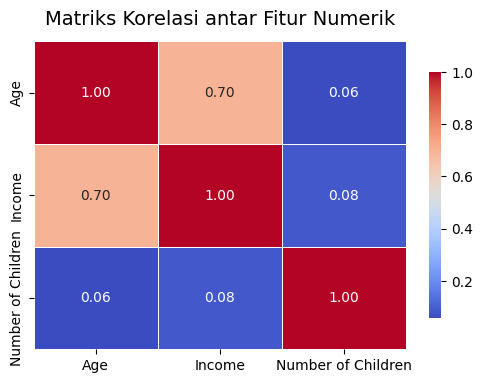

In [11]:
# Matriks korelasi
df_num = df.select_dtypes(include=["int64", "float64"])
corr_matrix = df_num.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriks Korelasi antar Fitur Numerik", fontsize=14, pad=12)
plt.show()

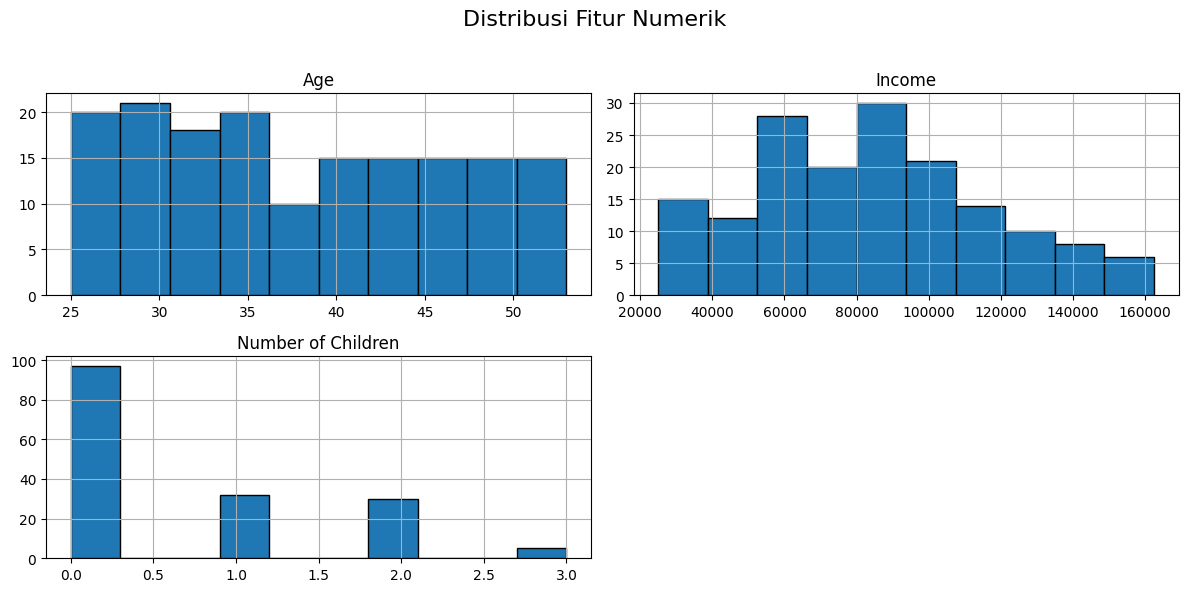

In [16]:
# Distribusi semua fitur numerik
df_num = df.select_dtypes(include=["int64", "float64"])

df_num.hist(
    figsize=(12,6),
    edgecolor="black"
)
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

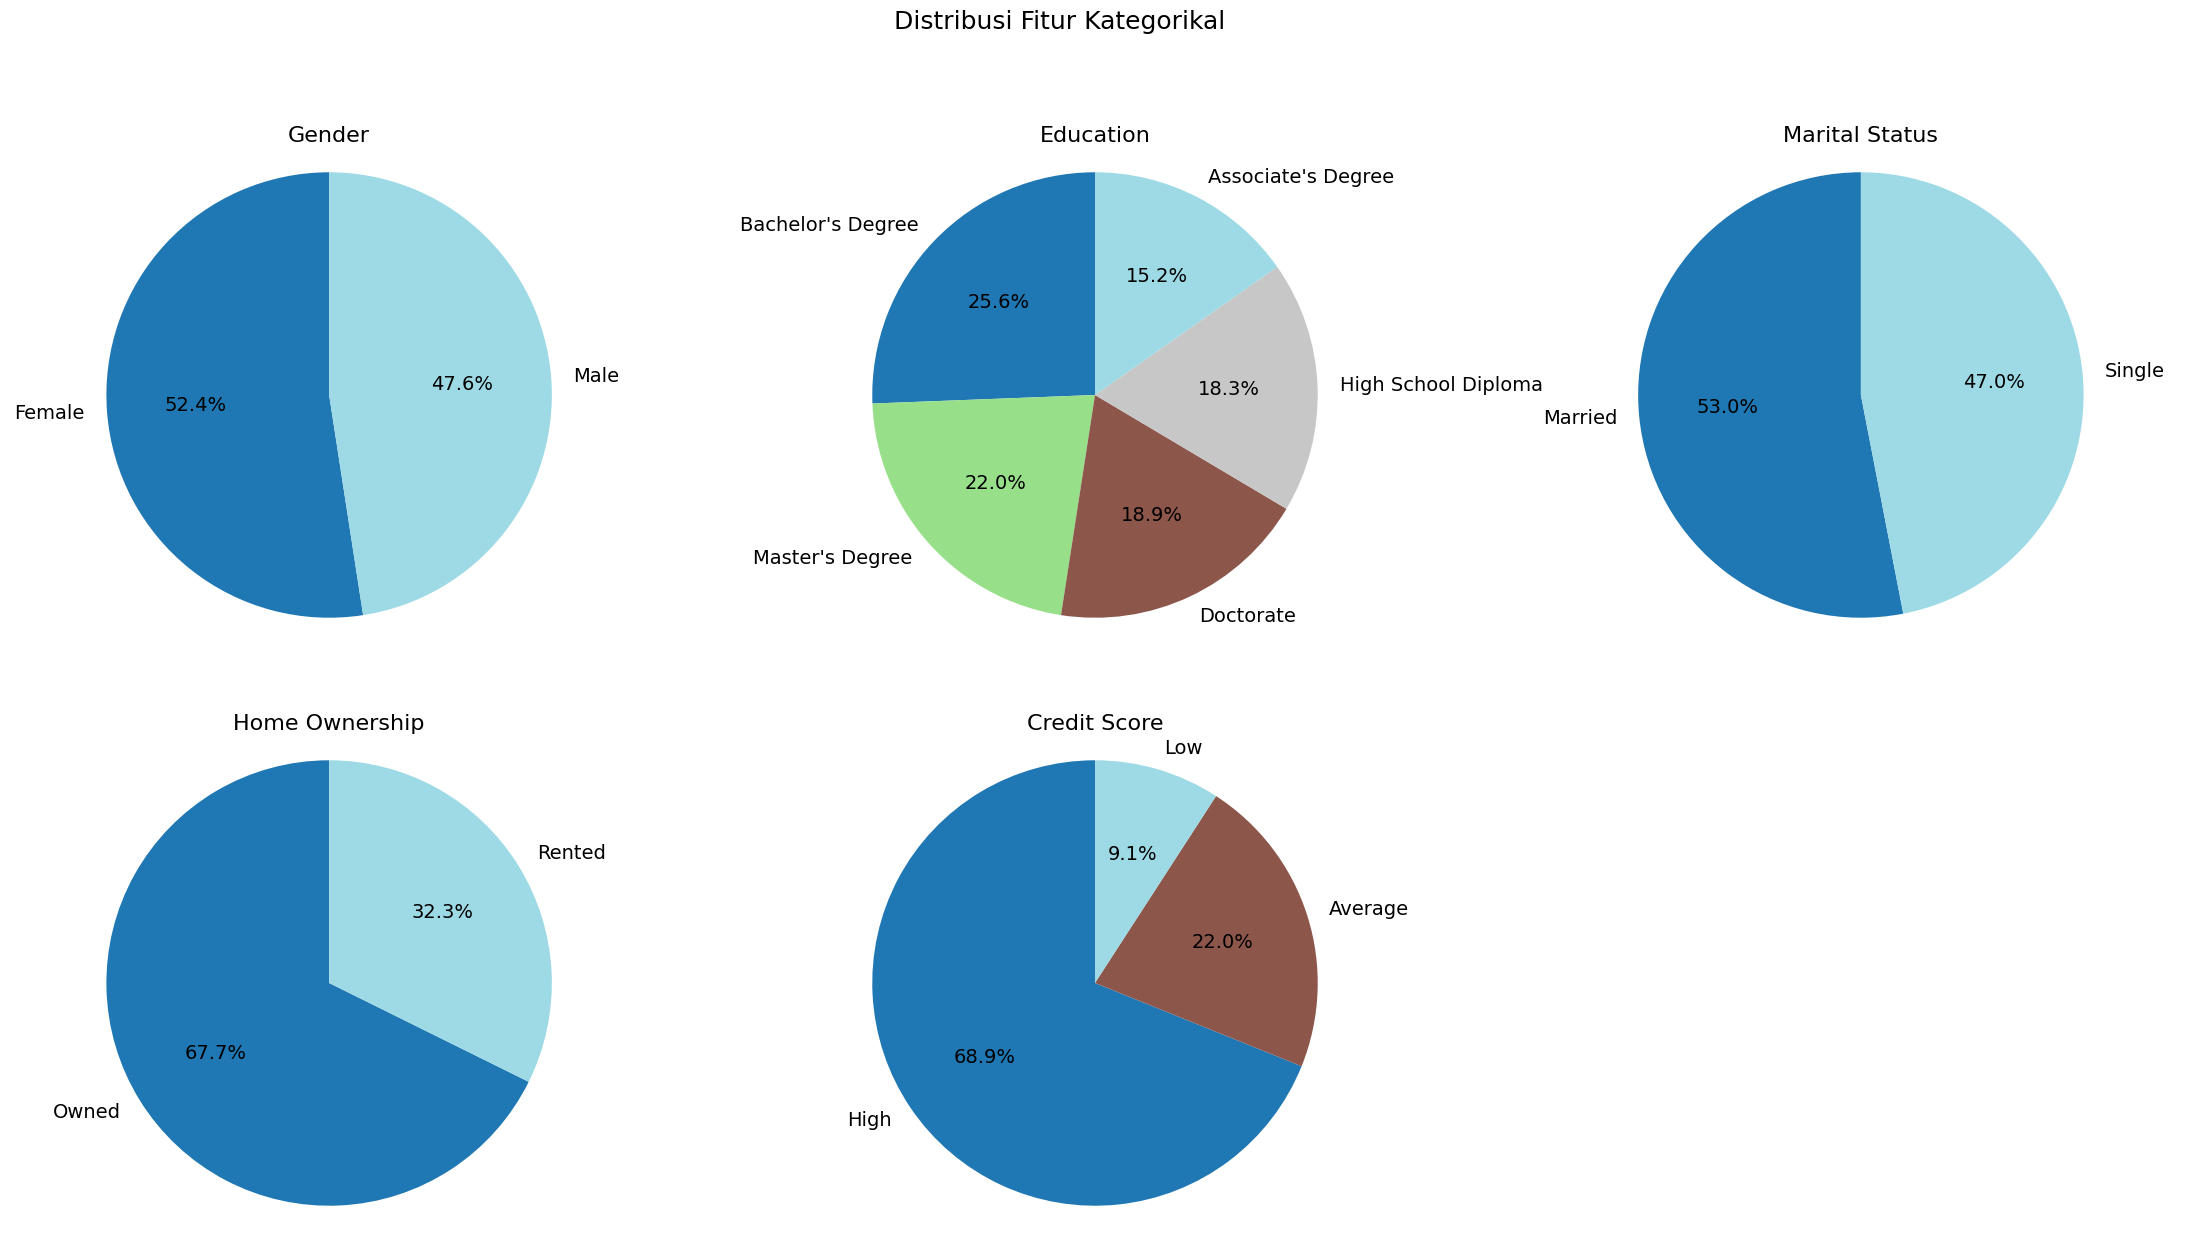

In [38]:
# Distribusi semua fitur kategorik
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
plt.figure(figsize=(28,14))
plt.suptitle("Distribusi Fitur Kategorikal", fontsize=18)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    counts = df[col].value_counts()
    counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        cmap='tab20',
        textprops={'fontsize': 14})

    plt.title(f'{col}', fontsize=16)
    plt.ylabel('')
    plt.axis('equal')

plt.tight_layout(rect=[1, 1, 0, 0.95])
plt.show()

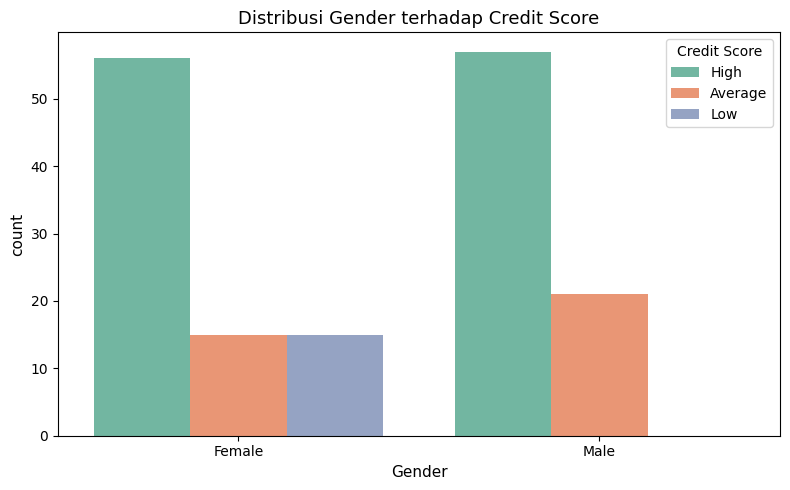

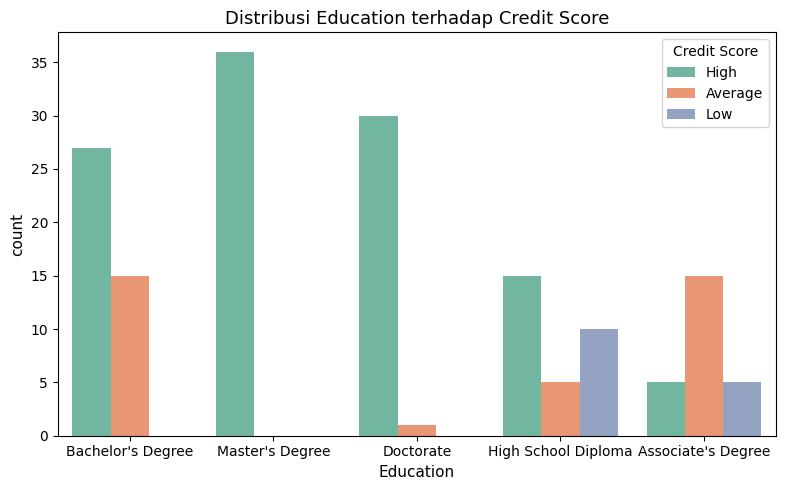

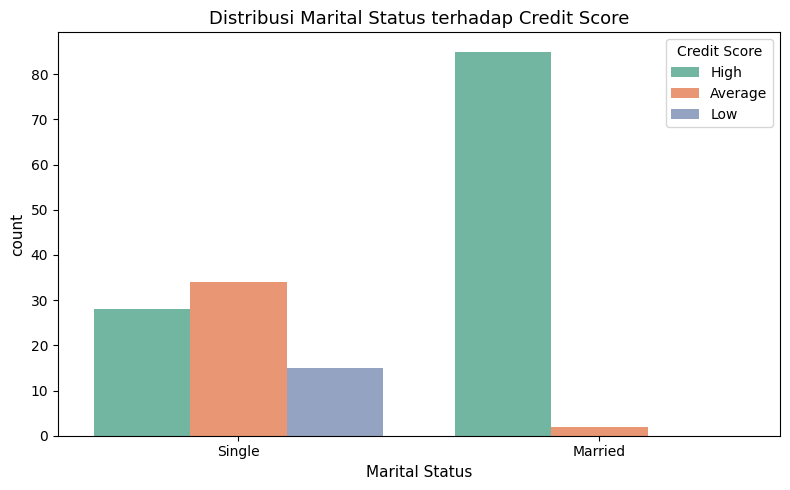

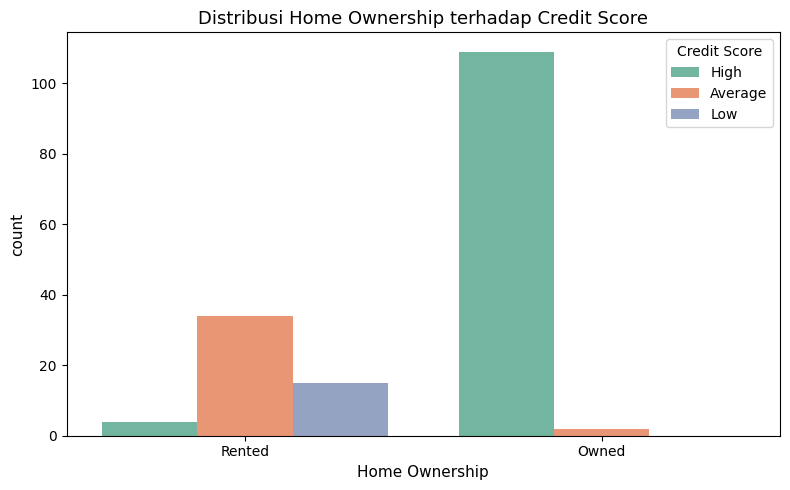

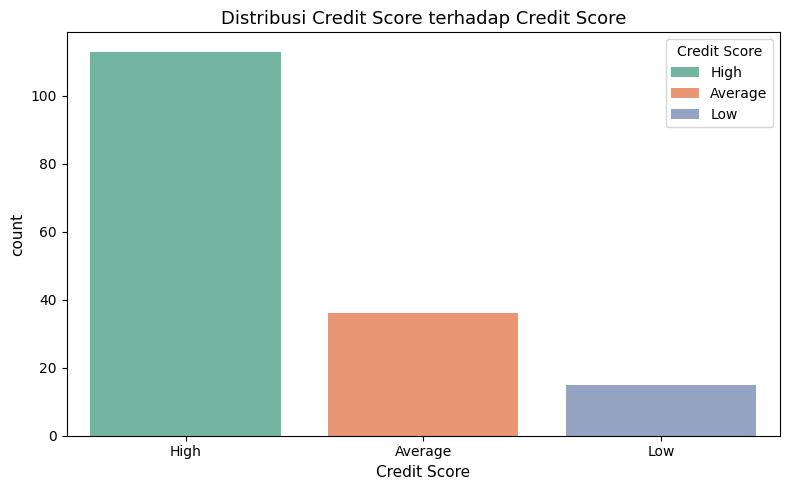

In [41]:
# Visualisasi distribusi fitur kategorik terhadap credit scorenya
cat_features = df.select_dtypes(include=['object']).columns

for col in cat_features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(
        x=col,
        hue="Credit Score",
        data=df,
        palette="Set2")

    plt.title(f"Distribusi {col} terhadap Credit Score", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("count", fontsize=11)
    plt.legend(title="Credit Score", labels=["High", "Average", "Low"])
    plt.tight_layout()
    plt.show()

## **Data Preparation**

In [43]:
# Feature definition
TARGET_COLUMN = 'Credit Score'

num_cols = [
    'Age',
    'Income',
    'Number of Children'
]

cat_cols = [
    'Gender',
    'Education',
    'Marital Status',
    'Home Ownership'
]

In [44]:
# Cek fitur
print("Target:", TARGET_COLUMN)
print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Target: Credit Score
Numerical: ['Age', 'Income', 'Number of Children']
Categorical: ['Gender', 'Education', 'Marital Status', 'Home Ownership']


In [45]:
# Split menjadi data train dan data test
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)

Train: (131, 7)
Test : (33, 7)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [46]:
# Periksa data kosong
df.isnull().sum()
# Menghapus data kosong jika ada
df = df.dropna()

In [47]:
# Menghapus data duplikat
df.duplicated().sum()

# Menghapus data duplikat jika ada
df = df.drop_duplicates()

In [48]:
# Imputasi fitur numerik
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num  = num_imputer.transform(X_test[num_cols])

# Imputasi fitur kategorik
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat  = cat_imputer.transform(X_test[cat_cols])

In [51]:
# Encoding fitur kategorik
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_enc = ohe.fit_transform(X_train_cat)
X_test_cat_enc  = ohe.transform(X_test_cat)

ohe_features = ohe.get_feature_names_out(cat_cols).tolist()

In [50]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num  = scaler.transform(X_test_num)

In [52]:
# Menggabungkan kembali data
X_train_final = np.hstack([X_train_scaled_num, X_train_cat_enc])
X_test_final  = np.hstack([X_test_scaled_num,  X_test_cat_enc])

final_features = num_cols + ohe_features

df_train_final = pd.DataFrame(X_train_final, columns=final_features)
df_train_final[TARGET_COLUMN] = y_train.values
df_train_final["is_train"] = 1

df_test_final = pd.DataFrame(X_test_final, columns=final_features)
df_test_final[TARGET_COLUMN] = y_test.values
df_test_final["is_train"] = 0

# Gabungkan semua
df_all = pd.concat([df_train_final, df_test_final], axis=0).reset_index(drop=True)

In [53]:
# Menampilkan hasil preprocessing
df_all.head()

,Age,Income,Number of Children,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit Score,is_train
0,1.597143,1.811071,-0.709687,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,High,1
1,0.253604,1.363964,-0.709687,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,High,1
2,-0.967796,0.991374,1.530530,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,High,1
3,-1.334216,-1.467720,-0.709687,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Low,1
4,-1.578496,-0.871576,-0.709687,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Average,1


In [55]:
# Simpan hasil preprocessing
df_all.to_csv('Credit Score Dataset_preprocessing.csv', index=False)

In [63]:
# Import fungsi otomatis dari file automate_Rosita_Angel_Cahyadi.py
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from automate_Rosita_Angel_Cahyadi import full_preprocessing_pipeline

df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Score Dataset_raw.csv')

# Jalankan preprocessing
df_automate = full_preprocessing_pipeline(
    df_raw,
    target_column="Credit Score",
    output_csv_path="/content/drive/MyDrive/Colab Notebooks/Credit Score Dataset_preprocessing.csv"
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

PREPROCESSING SELESAI!
File disimpan di: /content/drive/MyDrive/Colab Notebooks/Credit Score Dataset_preprocessing.csv


In [64]:
# Membaca hasil prepocessing dari fungsi automate yang telah dibuat
df_automate.head()

,Age,Income,Number of Children,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit Score,is_train
0,1.502454,1.488674,-0.699547,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,High,1
1,0.341206,0.239113,-0.699547,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,High,1
2,0.457331,0.239113,-0.699547,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,High,1
3,-1.284541,-1.713325,-0.699547,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Low,1
4,-0.471667,-0.073277,0.506055,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,High,1


In [65]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>